In [134]:
import numpy as np
import matplotlib.pyplot as plt

In [135]:
#@title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

In [136]:
#@title Helper functions

def plot_observed_vs_predicted(x, y, y_hat, theta_hat, intercept_hat):
  """ Plot observed vs predicted data

  Args:
      x (ndarray): observed x values
  y (ndarray): observed y values
  y_hat (ndarray): predicted y values

  """
  fig, ax = plt.subplots()
  ax.scatter(x, y, label='Observed')  # our data scatter plot
  ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model
  # plot residuals
  ymin = np.minimum(y, y_hat)
  ymax = np.maximum(y, y_hat)
  ax.vlines(x, ymin, ymax, 'g', alpha=0.5, label='Residuals')
  ax.set(
      title=fr"Intercept = {intercept_hat}, Slope = {theta_hat:0.2f}, MSE = {mse(x, y, theta_hat, intercept_hat):.2f}",
      xlabel='customer satisfaction',
      ylabel='sales ($)'
  )
  ax.legend()


def mse(x, y, theta_hat, intercept):
  """Compute the mean squared error

  Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
    theta_hat (float): An estimate of the slope parameter
    
  Returns:
    float: The mean squared error of the data with the estimated parameter.
  """
  ####################################################
  ## TODO for students: compute the mean squared error
  # Fill out function and remove
  # raise NotImplementedError("Student exercise: compute the mean squared error")
  ####################################################

  # Compute the estimated y 
  y_hat = intercept + theta_hat * x

  # Compute mean squared error
  # mse = 1/len(x) * np.sum((y-y_hat)**2)
  mse = np.mean((y-y_hat)**2)

  return mse

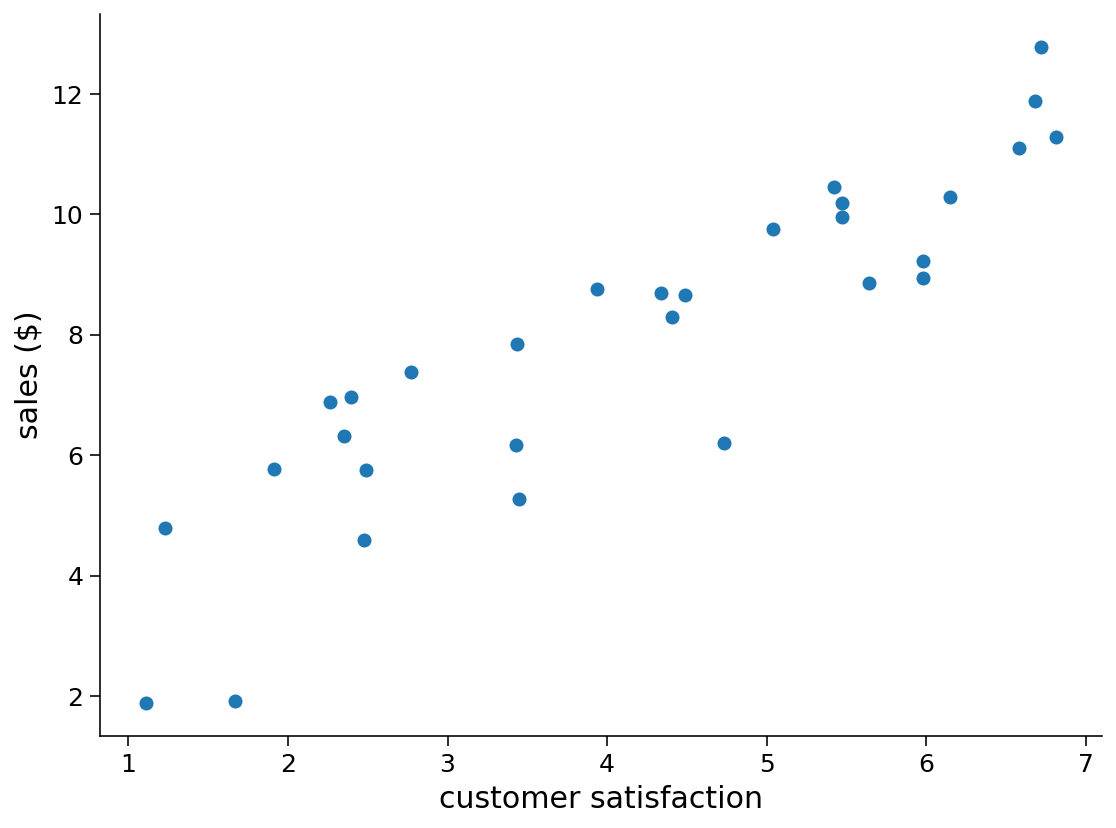

In [137]:
# @title 

# @markdown Execute this cell to generate some simulated data

# setting a fixed seed to our random number generator ensures we will always
# get the same psuedorandom number sequence
np.random.seed(121)

# Let's set some parameters
theta = 1.2
n_samples = 30
constant = 3

# Draw x and then calculate y
x = 6 * np.random.rand(n_samples) + 1  # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples)  # sample from a standard normal distribution
y = constant + theta * x + noise

# Plot the results
fig, ax = plt.subplots()
ax.scatter(x, y)  # produces a scatter plot
ax.set(xlabel='customer satisfaction', ylabel='sales ($)');

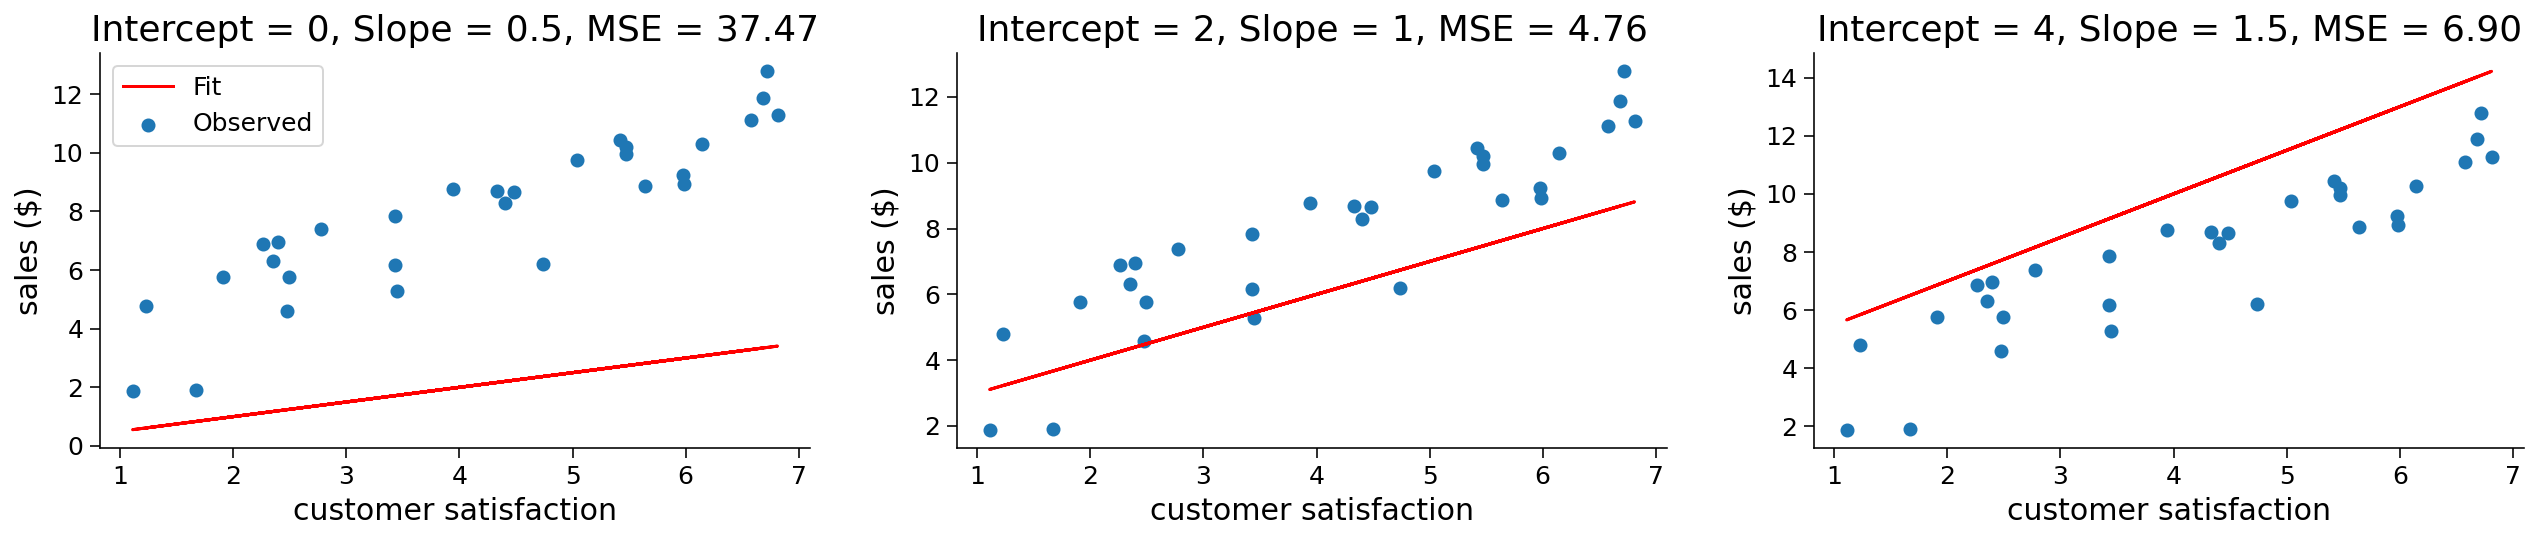

In [138]:
#@title

#@markdown Execute this cell to visualize estimated models
theta_hats = [0.5, 1, 1.5]
intercepts = [0, 2, 4]

fig, axes = plt.subplots(ncols=3, figsize=(18, 4))
for theta_hat, ax, intercept in zip(theta_hats, axes, intercepts):

  # True data
  ax.scatter(x, y, label='Observed')  # our data scatter plot

  # Compute and plot predictions
  y_hat = intercept + theta_hat * x
  ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model

  ax.set(
      title= fr'Intercept = {intercept}, Slope = {theta_hat}, MSE = {mse(x, y, theta_hat, intercept):.2f}',
      xlabel='customer satisfaction',
      ylabel='sales ($)'       
  );

axes[0].legend()

In [139]:
#@title 

#@markdown Make sure you execute this cell to enable the widget!

@widgets.interact(intercept_hat=widgets.FloatSlider(6.0, min=0.0, max=10.0),
                  slope_hat=widgets.FloatSlider(0.0, min=-2.0, max=2.0))

def plot_data_estimate(slope_hat, intercept_hat):
  y_hat = intercept_hat + slope_hat * x
  plot_observed_vs_predicted(x, y, y_hat, slope_hat, intercept_hat)

interactive(children=(FloatSlider(value=0.0, description='slope_hat', max=2.0, min=-2.0), FloatSlider(value=6.…

In [140]:
#@title Calculate OLS estimators
X = np.hstack((np.ones((n_samples, 1)), x.reshape(30,1)))
theta_hat = np.linalg.inv(X.T@X)@X.T@y
print(f'Intercept = {theta_hat[0]:.2f}, Slope = {theta_hat[1]:.2f}, MSE = {mse(x, y, theta_hat[1], theta_hat[0]):.2f}')

Intercept = 2.26, Slope = 1.36, MSE = 1.35
